<center>
    <h1>Qubot: Designing an Intelligent Bot to Perform Acceptance Testing</h1>
    <br>
    Anthony  Krivonos  (ak4483) <br>
    COMS  E6156  Topics  in  Software  Engineering
    <br><br>
    <h3>Accompanying Experiments</h3>
</center>

> **Goal:** We want to create an intelligent automated testing suite capable of acceptance testing small portions of code bases the way a human QA tester would.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Experiment 1

## Portability and Feasibility:  Deciding on a Robust Automated Testing Architecture

### Portability Test

How many steps does it take to set up an arbitrary test?

#### Stassy # Steps to Set Up

In [2]:
# Note: Stassy setup steps were not provided, but rather inferred
#       from reading the respective paper.
stassy_set_up_steps = [
    "define all pages in SUT",
    "define all functions in SUT",
    "write manual test cases",
    "assert results in manual test cases",
    "generate reports after tests conclude",
]

# Count estimated number of setup steps
stassy_set_up_steps_count = len(stassy_set_up_steps)

stassy_set_up_steps_count

5

#### SAT # Steps to Set Up

In [3]:
# Note: SAT setup steps taken loosely from flowchart in Figure 2
#       and may be wildly inaccurate.
sat_set_up_steps = [
    "developer defines testing interfaces and classes",
    "developer interfaces with Selenium WebDriver",
    "tester runs proposed SAT framework",
    "SAT automatically generates a set of test cases",
]

# Count estimated number of setup steps
sat_set_up_steps_count = len(sat_set_up_steps)

sat_set_up_steps_count

4

#### AppFlow # Steps to Set Up

In [4]:
# Note: AppFlow setup steps taken from "5. APPLYING A TEST LIBRARY TO A NEW
#       APP" section of the paper.
appflow_set_up_steps = [
    "developer assigns test variables and overrides classification errors for ML",
    "developer adds custom flows to test app-specific behaviors",
    "developer runs AppFlow to synthesize tests and record P/F results",
    "developer then (optionally) proceeds to apply this flow to test a new version of the app",
]

# Count estimated number of setup steps
appflow_set_up_steps_count = len(appflow_set_up_steps)

appflow_set_up_steps_count

4

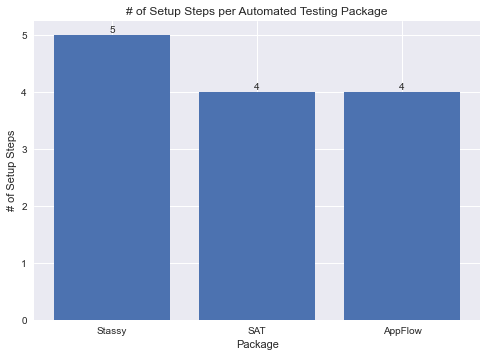

In [5]:
packages = ['Stassy', 'SAT', 'AppFlow']
set_up_steps = [stassy_set_up_steps_count, sat_set_up_steps_count, appflow_set_up_steps_count]

bars = [i for i, _ in enumerate(packages)]

plt.bar(bars, set_up_steps)
plt.xlabel("Package")
plt.ylabel("# of Setup Steps")
plt.title("# of Setup Steps per Automated Testing Package")

plt.xticks(bars, packages)

# Label bars
for i in range(len(set_up_steps)):
    plt.annotate(str(set_up_steps[i]), xy=(i, set_up_steps[i]), ha='center', va='bottom')

plt.show()

### Feasibility Test

How many code files are present in each framework?

#### Stassy # of Files to Code

In [6]:
# Note: Stassy codebase was not provided, so estimates were made from the
#       description of the architecture from the paper
stassy_arch_file_counts = {
    "custom_exception_package": 1, # one custom exception
    "main_package": 1, # one XML script evaluator
    "object_repository_package": 114, # assume 1 file per DOM element; see list here: https://eastmanreference.com/complete-list-of-html-tags
    "reusable_functions_package": 1, # estimation; assume most functions in object_repository_package are unique
    "test_specs_package": 0, # unknown and up to the implementer
    "utilities_package": 1, # assume all utility functions are all in one folder
    "reports_package": 1, # assume one file to generate reports
    "library_compressed_logic": 0, # contains all jar files; no LOC
}

# Count estimated number of files in Stassy architecture
files_in_stassy_arch = np.sum([stassy_arch_file_counts[c] for c in stassy_arch_file_counts])

files_in_stassy_arch

119

#### SAT # of Files to Code

In [7]:
# Note: SAT codebase was not provided, so estimates were made from the actions in
#       the flow chart in Figure 2 of the paper, as well as the author's software
#       engineering experience.
sat_arch_file_counts = {
    "selenium_connectivity_package": 1, # one file to call Selenium functions from
    "json_data_recording_package": 1, # one file that transcripts HTML contents to JSON for SUT input
    "tcs_generator": 1, # one file to generate TCS sheet and a LOC per row in Test Case Steps (TCS) sheet
    "tcs_runner": 1, # one file to run generated test scripts
    "utilities_package": 1, # assume all utility functions are all in one folder
}

# Count estimated number of files in SAT architecture
files_in_sat_arch = np.sum([sat_arch_file_counts[c] for c in sat_arch_file_counts])

files_in_sat_arch

5

#### AppFlow # of Files to Code

In [8]:
# AppFlow codebase: https://github.com/columbia/appflow
appflow_arch_file_counts = {
    "src_package": 98, # 98 source files in src as of 10 Feb 2021
}

# Count estimated number of files in AppFlow architecture
files_in_appflow_arch = np.sum([appflow_arch_file_counts[c] for c in appflow_arch_file_counts])

files_in_appflow_arch

98

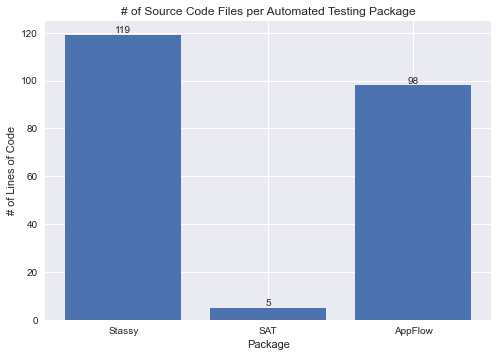

In [9]:
packages = ['Stassy', 'SAT', 'AppFlow']
file_counts = [files_in_stassy_arch, files_in_sat_arch, files_in_appflow_arch]

bars = [i for i, _ in enumerate(packages)]

plt.bar(bars, file_counts)
plt.xlabel("Package")
plt.ylabel("# of Lines of Code")
plt.title("# of Source Code Files per Automated Testing Package")

plt.xticks(bars, packages)

# Label bars
for i in range(len(file_counts)):
    plt.annotate(str(file_counts[i]), xy=(i, file_counts[i]), ha='center', va='bottom')

plt.show()

# Experiment 2

## Intelligence:  Making Qubot Think for Itself

In [10]:
from qubot.ui import UIAction, UITreeNode
from qubot.environment import QLearningEnvironment
from qubot.driver import Driver

### Constructing a UITree for the Testing Environment

The Q-learning technique from both Fastbot and DRIFT will be tested by attempting to navigate from the root of `https://upmed-starmen.web.app/` to the "Log in as a Healthcare Provider" button on `https://upmed-starmen.web.app/signin`.

In [11]:
test_website = "https://upmed-starmen.web.app/"

In [12]:
driver = Driver()
tree = driver.construct_tree(test_website)

In [13]:
tree.set_terminal_node(html_class="SignIn_login_hcp__qYuvP")
tree.print()

NAVIGATE: <html id="" class=""> (a6811b53-d208-4c4f-8a1a-d8f987c25ee7)
	NAVIGATE: <head id="" class=""> (35e844f9-bd0f-c542-878a-8ca0c6c8f0b1)
		NAVIGATE: <meta id="" class=""> (0cde5fe3-bc40-6e48-a809-9b3a6c9b8ec8)
		NAVIGATE: <link id="" class=""> (ae2d3930-40f6-8d46-a90d-c8d5a3d825f3)
		NAVIGATE: <meta id="" class=""> (840c27b5-05c4-af4a-9c84-73addad66796)
		NAVIGATE: <meta id="" class=""> (f0112478-6974-bd48-9f59-1fd7f02e8b4f)
		NAVIGATE: <meta id="" class=""> (0089ed7c-9976-4849-8d25-e8900946ab86)
		NAVIGATE: <link id="" class=""> (8b1d132d-c009-c34b-845f-c94c5693ab8c)
		NAVIGATE: <link id="" class=""> (d1cd76d5-518e-ba4c-8c79-ba7cbeba6d3c)
		NAVIGATE: <title id="" class=""> (d538050b-e762-fd4c-8636-9c09cc59194d)
		NAVIGATE: <script id="" class=""> (9b4bb621-4653-e144-8f22-93a25f474de5)
		NAVIGATE: <script id="" class=""> (894c9d44-69eb-b04d-97ed-65cb6605cc0e)
		NAVIGATE: <script id="" class=""> (d298b3ef-4219-8645-8a42-32ffdf01ec80)
		NAVIGATE: <script id="" class=""> (2f9e4d24-8

### Training the Q-Learning Agent

We will train the Q-learning agent to find the "Log in as a Healthcare Provider" button on `https://upmed-starmen.web.app/signin`.

In [84]:
def reward_func(action: UIAction, node: UITreeNode):
    if node.is_terminal():
        return 100
    elif not node.get_children():
        return 0
    elif action == UIAction.LEFT_CLICK:
        return 5
    return 0

In [85]:
# Constants
alpha = 0.1     # higher alpha   ==> consider more recent information (learning rate)
gamma = 0.01    # higher gamma   ==> long term rewards
epsilon = 0.1     # higher epsilon ==> favor exploitation
decay = 0.01    # higher decay   ==> epsilon decreases faster (more randomness)

train_episodes = 100
test_episodes = 100
max_steps = 1000

In [86]:
env = QLearningEnvironment(tree, reward_func, alpha, gamma, epsilon, decay, max_steps)
env.reset()

In [87]:
env.train(train_episodes)

Training on 100 episodes...
Training done.


In [88]:
env.render()

Q-learning agent
Steps:                  97098
Alpha:                 0.1000
Gamma:                 0.0100
Original epsilon:      0.1000
Current epsilon:       0.3779
Decay:                 0.0100
Training rewards:       13280
Training score:        132.8000
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


### Testing the Q-Learning Agent

We will see how adept the Q-learning agent is at finding the image of black sand next to the sign-in options on `https://upmed-starmen.web.app/signin`.

In [89]:
tree.unset_terminal_node(html_class="SignIn_login_hcp__qYuvP")
tree.set_terminal_node(html_class="SignIn_tile_img__1VCWa")
env.test(test_episodes)

Testing on 100 episodes...
Testing done.


In [90]:
env.render()

Q-learning agent
Steps:                  190928
Alpha:                 0.1000
Gamma:                 0.0100
Original epsilon:      0.1000
Current epsilon:       0.3779
Decay:                 0.0100
Training rewards:       13280
Training score:        132.8000
Testing rewards:        54180
Testing score:         541.8000
Testing penalties:          0
Testing penalty rate:  0.0000


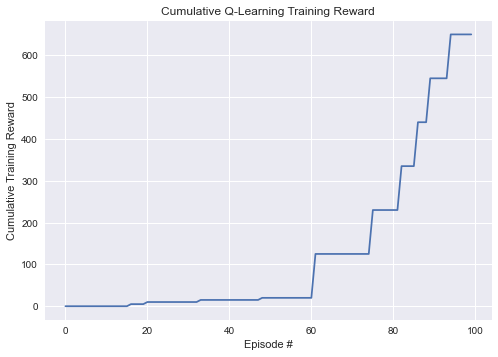

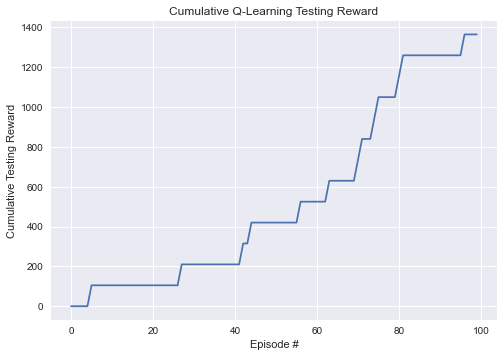

In [95]:
x = range(len(env.get_training_rewards_history()))

plt.plot(x, env.get_training_rewards_history())
plt.xlabel('Episode #')
plt.ylabel('Cumulative Training Reward')
plt.title('Cumulative Q-Learning Training Reward') 
plt.show()

plt.plot(x, env.get_testing_rewards_history())
plt.xlabel('Episode #')
plt.ylabel('Cumulative Testing Reward')
plt.title('Cumulative Q-Learning Testing Reward') 
plt.show()